# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices


## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.


In [1]:
# Import libraries necessary for this project
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


### Implementation: Calculate Statistics
In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.94
Median price $438900.0
Standard deviation of prices: $165171.13


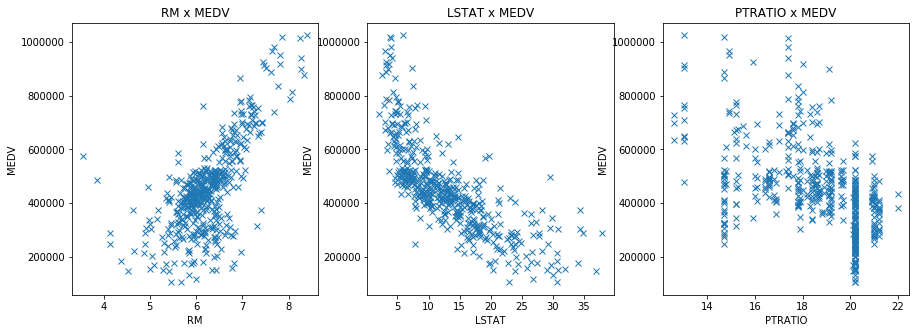

In [2]:
minimum_price = min(prices)
maximum_price = max(prices)
mean_price = prices.mean()
median_price = prices.median()
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${:.2f}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${:.2f}".format(std_price))

# code to show that my theory on question 1 is correct
def show_price_on_feature_variation():
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(features.columns):
        plt.subplot(1, 3, i+1)
        plt.plot(data[col], prices, 'x')
        plt.title('%s x MEDV' % col)
        plt.xlabel(col)
        plt.ylabel('MEDV')

show_price_on_feature_variation()

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Answer: 
1) An increase in the value of the feature "RM" will increase the worth of the house, this because we have to suppose that having more rooms means having a bigger house.
Even if this is not necessarly true, without having the square meters as a feature we have to rely on the number of rooms.
2) By increasing the value of "LSTAT" the worth of the house will decrease, because this means that the house is not in a rich area.
3) An increase in the value of "PTRATIO" will decrease the worth of the house, because this means having less schools or smaller schools, consequently school's rooms will be overcrowded.
As confirmation to my hypothesis the graph above, shows the price for every feature variation.
**

### Implementation: Shuffle and Split Data
For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

### Question 2 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Answer: 
To train the model we must use only the training set and leave some data as testing set, otherwise if we use the testing set as well, we might get fake results by looking at the score ratio.
For example if we train our model without testing it we might get a really good fit with high score ratio, but when we test it with some other data it is not predicting as good as we were expecting.
In this case we talk about overfitting which means the model is not generalizing well but instead it memorizes the data.
In case of overfitting then, the only way to detect it is by looking how the model reacts with data it has never seen before (testing data).
For all these reasons we need to split our data, so we can see how the model reacts with data it has never seen before and its capability to generalize them.**

----

## Analyzing Model Performance

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

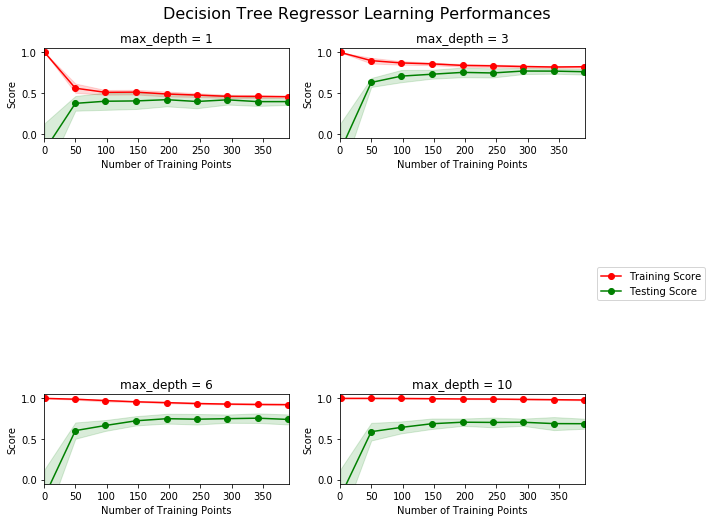

In [4]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 3 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Answer: 
Maximum depth = 3
By increasing the number of training points, the score of the training curve decreases, more gradually after 50 training points.
About the testing curve, it's score has a big increase during the first 50 training points, after them it increases gradually.
The two curves are converging in a good score ratio by increasing the number of training points, but as we can see from the graph, after 300 training points the convergence between the 2 curves is imperceptible, so in conclusion having more training points will not significantly benefit the model.
**

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.

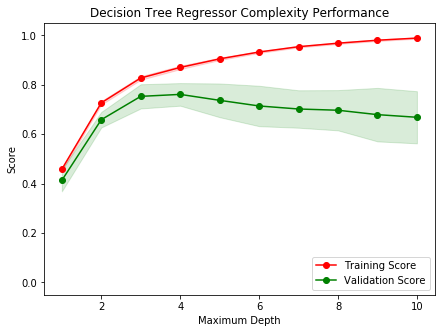

In [5]:
vs.ModelComplexity(X_train, y_train)

### Question 4 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Answer: 
1) It suffers from high bias.
2) At maximum depth of 10 the model suffers from high variance, because the gap between the training score and the validation score is high, which means the model is just memorizing the training data and is not generalizing well the data.**

### Question 5 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

**Answer: 
The model with maximum depth of 4 generalizes the best, this because the score of training and validation are high but also not distant from each other (validation score with maximum depth of 3 is a bit less).**

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 6 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

**Answer: 
The grid search technique is a technique that tests differrent hyperparameters to find out which is the best based on the score ratio.
An example would be using the maximum depth with value 1, 3, 7 and 10 for a decision tree.
The grid search technique will tests each one of these values and will pick the best based on the score ratio.
It is very usefull because we can automatize the process instead of changing the parameters to see which configuration fits the best the data.
**

### Question 7 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Answer: 
The k-fold cross-validation technique is a technique that divides all the training data into groups, called folds and "K" is the number of folds.
Each fold is constituted by two arrays, the first one is related to the training set, and the second one to the test set.
So for example this technique will divide only the training data into 4 (K=4) number of folds and it will return 4 training sets and 4 testing sets.

K-fold technique provides a big benefit to grid search technique because it generate different training and testing sets which are used from the grid search technique to pick up the best configuration for the model.
In this way we can test the model with a large variety of data which help us to generalize it better.
In addiction, K-fold helps to prevent overfitting by providing test sets from the training set.
**

### Implementation: Fitting a Model
The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. 
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `r2_score` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [6]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    regressor = DecisionTreeRegressor()
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    scoring_fnc = make_scorer(r2_score)
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid.fit(X, y)
    return grid.best_estimator_

### Making Predictions

### Question 8 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 5**?

In [7]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Print the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


**Answer: 
The optimal model has the value of maximum depth of 4.
This result match with my guess.
**

### Question 9 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

In [8]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))


Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: 

Client1 = $403,025.00.

Client2 = $237,478.72.

Client3 = $931,636.36.

By looking at the output above we can see the minimum, median and maximum value of the price and every feature in our dataset.
The client number 2 has only 4 rooms, Neighborhood poverty level at 32 percent and Student-teacher ratio of 22 to 1.
As we can see the number of rooms is close to the "RM min" value of our dataset and the other 2 features are close to the respective max value.
As we saw in the Data Exploration graph, we were expecting a low price of the house with these features and as we can see, the price is not far from the minimum price in our dataset.
The client number 1 has features more in the average of the dataset, infact the price of his house is in the average of our data.
Same thing for the client number 3 who has 8 rooms and really low level of Neighborhood poverty and Student-teacher ratio, with these features we are expecting a really high price of the house infact it is close to the highest price of our dataset.
As we saw in the Data Exploration section, by increasin the number of rooms the price gets higher and by increasing Neighborhood poverty level or Student-teacher ratio, the price of the house decrease.
In conclusion we can confirm that these prices seem reasonable, given the values for the respective features, because are in the range of our dataset and also preaty close to our minimum, median and maximum value of our price dataset.

**

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [9]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 10 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: 
This model unfortunatly can not be used in a real world setting.
The collected data are too old and the inflation is a crucial point to consider.
As i said in the question 1 the features are not really enough, for example we have the number of rooms but not the square meters of the area, are missing features like presence of garden, pool, balcony etc..
The data is collected only in Boston, so it can't be used for other countries neither other cities.
The features describe the neighborhood more than the house itself, so for all these reasons the model can not be considered as useful in a real scenario.
**